In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('/content/bmi (1).csv')
print(df)

     Gender  Height  Weight  Index
0      Male     174      96      4
1      Male     189      87      2
2    Female     185     110      4
3    Female     195     104      3
4      Male     149      61      3
..      ...     ...     ...    ...
495  Female     150     153      5
496  Female     184     121      4
497  Female     141     136      5
498    Male     150      95      5
499    Male     173     131      5

[500 rows x 4 columns]


In [4]:
df.head()

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3


In [5]:
print(df)

     Gender  Height  Weight  Index
0      Male     174      96      4
1      Male     189      87      2
2    Female     185     110      4
3    Female     195     104      3
4      Male     149      61      3
..      ...     ...     ...    ...
495  Female     150     153      5
496  Female     184     121      4
497  Female     141     136      5
498    Male     150      95      5
499    Male     173     131      5

[500 rows x 4 columns]


In [6]:
df.shape

(500, 4)

In [7]:
print(df)

     Gender  Height  Weight  Index
0      Male     174      96      4
1      Male     189      87      2
2    Female     185     110      4
3    Female     195     104      3
4      Male     149      61      3
..      ...     ...     ...    ...
495  Female     150     153      5
496  Female     184     121      4
497  Female     141     136      5
498    Male     150      95      5
499    Male     173     131      5

[500 rows x 4 columns]


In [8]:
df.dtypes

Gender    object
Height     int64
Weight     int64
Index      int64
dtype: object

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Gender  500 non-null    object
 1   Height  500 non-null    int64 
 2   Weight  500 non-null    int64 
 3   Index   500 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 15.8+ KB


In [10]:
df.Gender.nunique()

2

In [11]:
df.Gender.unique()

array(['Male', 'Female'], dtype=object)

In [12]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Frequency')

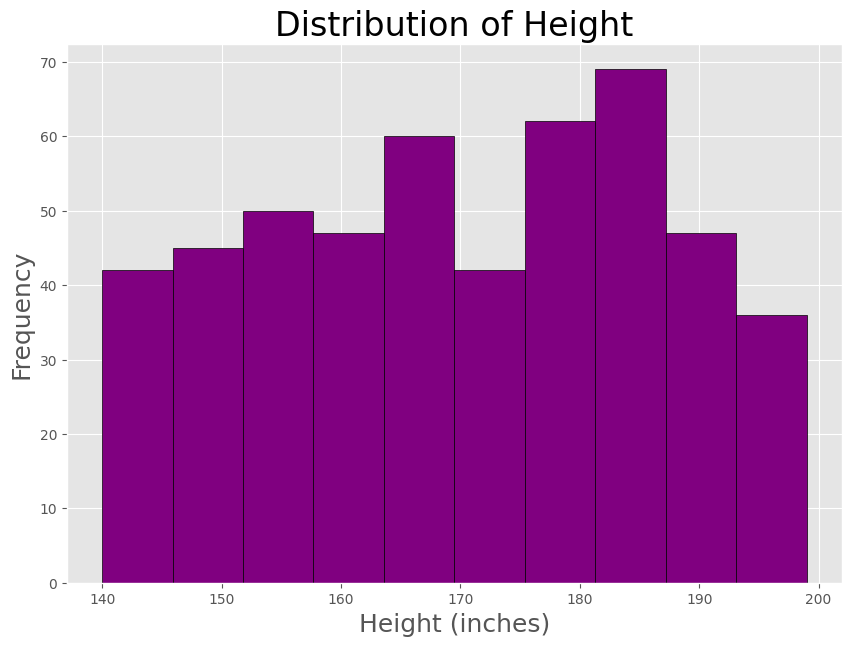

In [13]:
plt.style.use('ggplot')
df.Height.plot(kind='hist', color='purple', edgecolor='black', figsize=(10,7))
plt.title('Distribution of Height', size=24)
plt.xlabel('Height (inches)', size=18)
plt.ylabel('Frequency', size=18)

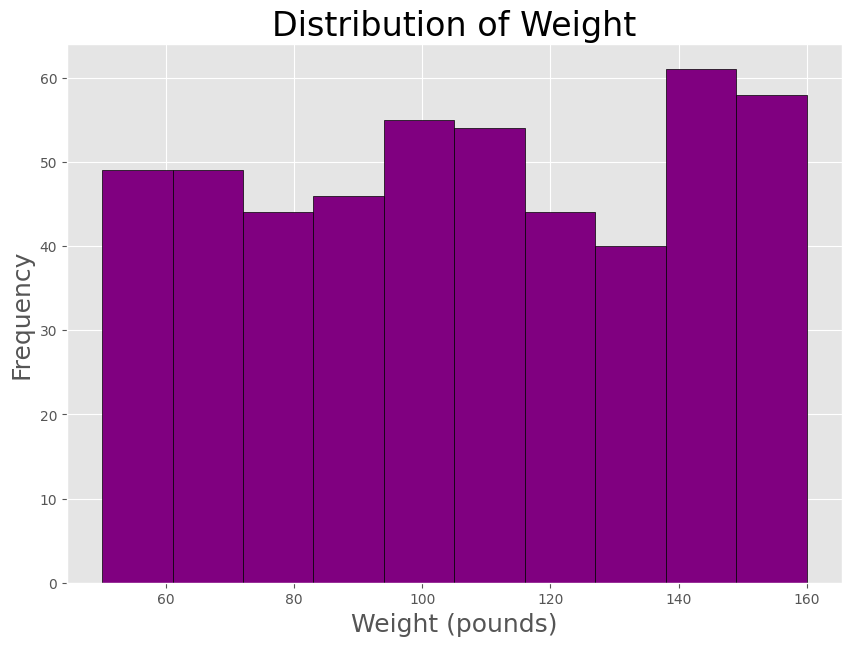

In [14]:
df.Weight.plot(kind='hist', color='purple', edgecolor='black', figsize=(10,7))
plt.title('Distribution of Weight', size=24)
plt.xlabel('Weight (pounds)', size=18)
plt.ylabel('Frequency', size=18);

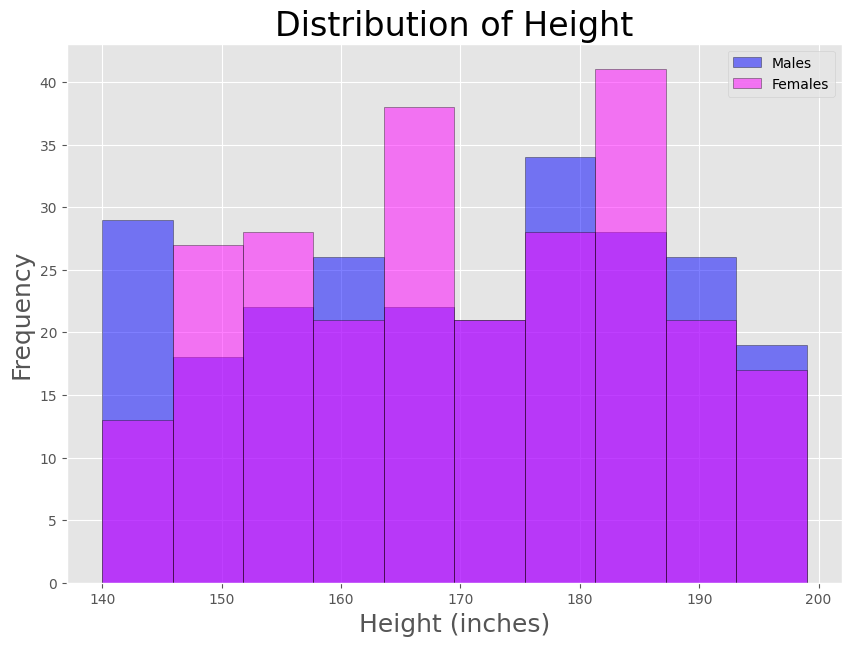

In [15]:
df[df['Gender'] == 'Male'].Height.plot(kind='hist', color='blue', edgecolor='black',
alpha=0.5, figsize=(10, 7))
df[df['Gender'] == 'Female'].Height.plot(kind='hist', color='magenta', edgecolor='black',
alpha=0.5, figsize=(10, 7))
plt.legend(labels=['Males', 'Females'])
plt.title('Distribution of Height', size=24)
plt.xlabel('Height (inches)', size=18)
plt.ylabel('Frequency', size=18);

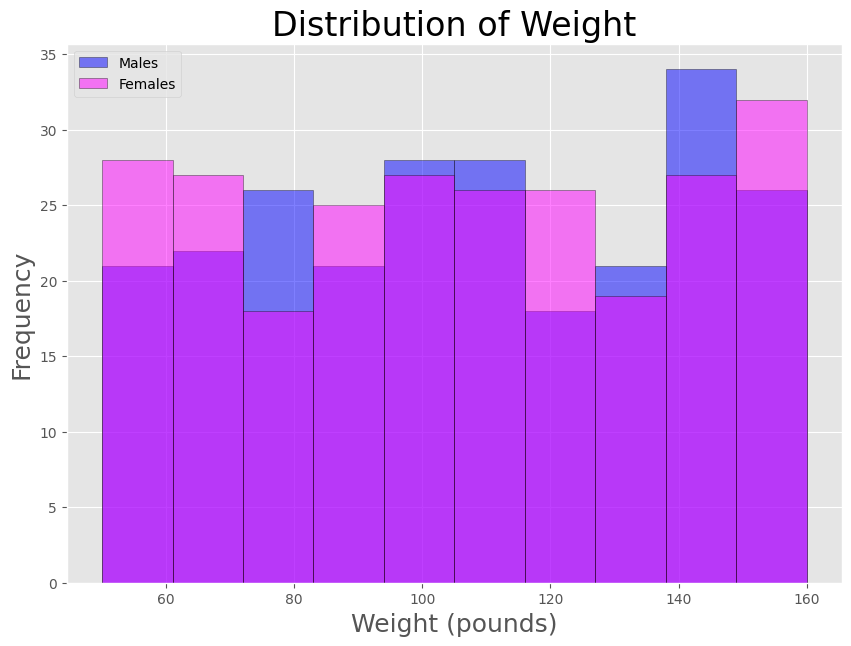

In [16]:
df[df['Gender'] == 'Male'].Weight.plot(kind='hist', color='blue', edgecolor='black',
alpha=0.5, figsize=(10, 7))
df[df['Gender'] == 'Female'].Weight.plot(kind='hist', color='magenta', edgecolor='black',
alpha=0.5, figsize=(10, 7))
plt.legend(labels=['Males', 'Females'])
plt.title('Distribution of Weight', size=24)
plt.xlabel('Weight (pounds)', size=18)
plt.ylabel('Frequency', size=18);

In [17]:
statistics_male = df[df['Gender'] == 'Male'].describe()
statistics_male.rename(columns=lambda x: x + '_male', inplace=True)
statistics_female = df[df['Gender'] == 'Female'].describe()
statistics_female.rename(columns=lambda x: x + '_female', inplace=True)
statistics = pd.concat([statistics_male, statistics_female], axis=1)

In [18]:
statistics

,Height_male,Weight_male,Index_male,Height_female,Weight_female,Index_female
count,245.000000,245.000000,245.000000,255.000000,255.000000,255.000000
mean,169.648980,106.314286,3.787755,170.227451,105.698039,3.709804
std,17.065665,31.832734,1.386355,15.711825,32.962025,1.325886
min,140.000000,50.000000,0.000000,140.000000,50.000000,0.000000
25%,154.000000,80.000000,3.000000,157.000000,79.000000,3.000000
50%,171.000000,105.000000,4.000000,170.000000,106.000000,4.000000
75%,183.000000,137.000000,5.000000,184.000000,135.000000,5.000000
max,199.000000,160.000000,5.000000,199.000000,160.000000,5.000000


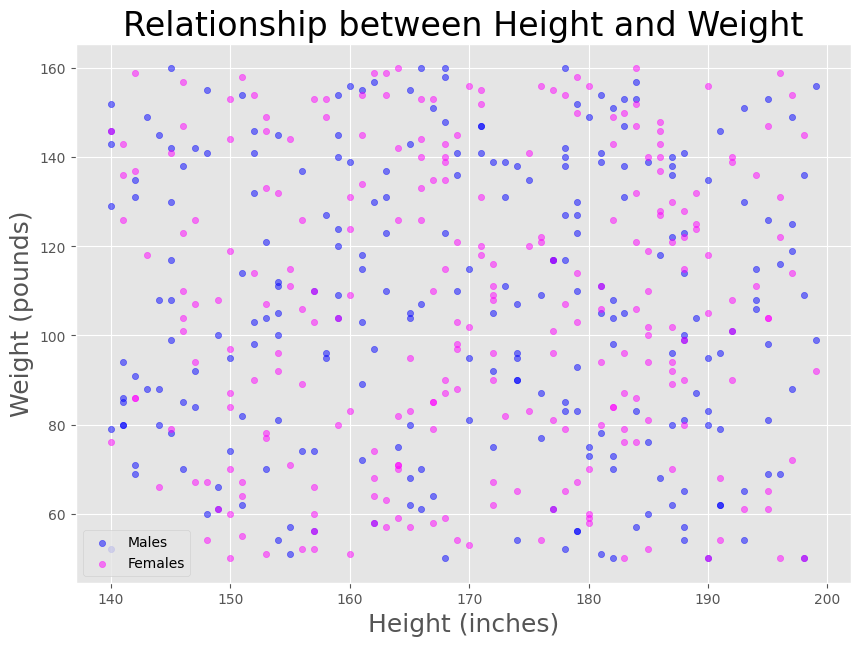

In [19]:
ax1 = df[df['Gender'] == 'Male'].plot(kind='scatter', x='Height', y='Weight', color='blue',
alpha=0.5, figsize=(10, 7))
df[df['Gender'] == 'Female'].plot(kind='scatter', x='Height', y='Weight', color='magenta',
alpha=0.5, figsize=(10 ,7), ax=ax1)
plt.legend(labels=['Males', 'Females'])
plt.title('Relationship between Height and Weight', size=24)
plt.xlabel('Height (inches)', size=18)
plt.ylabel('Weight (pounds)', size=18);

In [21]:
sample_females = df[df['Gender'] == 'Female'].sample(500)
sample_females.plot(kind='scatter', x='Height', y='Weight', color='magenta', alpha=0.5,
figsize=(10, 7))
plt.legend(labels=['Females'])
plt.title('Relationship between Height and Weight (sample of 500 females)', size=20)
plt.xlabel('Height (inches)', size=18)
plt.ylabel('Weight (pounds)', size=18);

ValueError: Cannot take a larger sample than population when 'replace=False'

In [22]:
import numpy as np
df_males = df[df['Gender'] == 'Male']
df_females = df[df['Gender'] == 'Female']
male_fit = np.polyfit(df_males.Height, df_males.Weight, 1)
female_fit = np.polyfit(df_females.Height, df_females.Weight, 1)

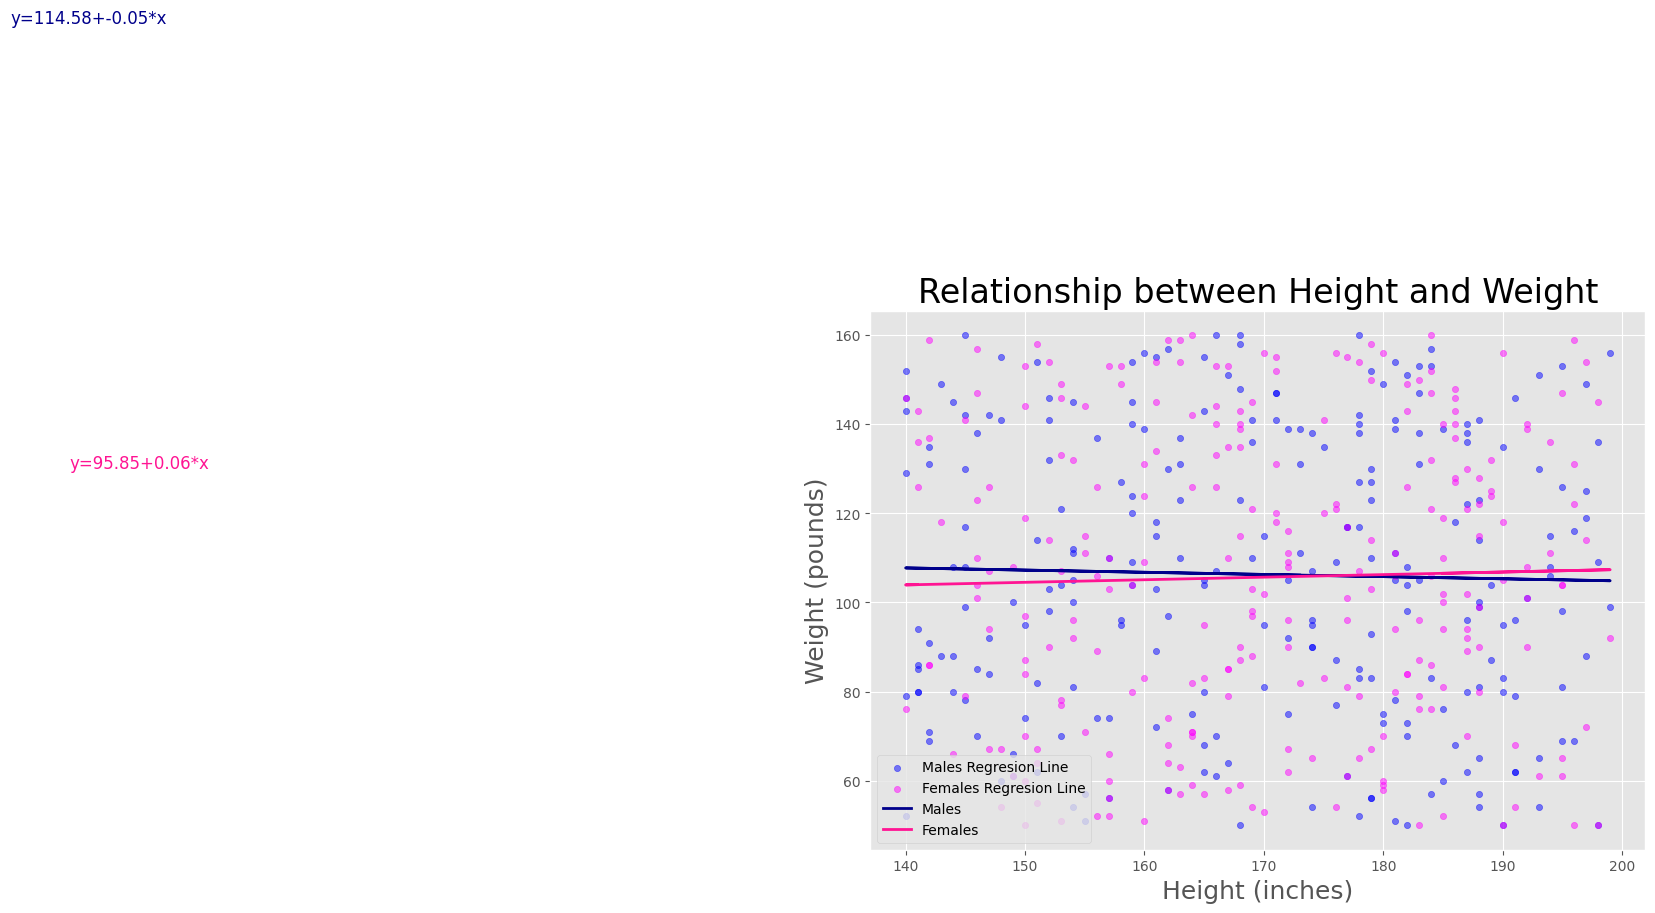

In [23]:
df_males = df[df['Gender'] == 'Male']
df_females = df[df['Gender'] == 'Female']
ax1 = df_males.plot(kind='scatter', x='Height', y='Weight', color='blue', alpha=0.5,
figsize=(10, 7))
df_females.plot(kind='scatter', x='Height', y='Weight', color='magenta', alpha=0.5, figsize=
(10, 7), ax=ax1)
plt.plot(df_males.Height, male_fit[0] * df_males.Height + male_fit[1], color='darkblue',
linewidth=2)
plt.plot(df_females.Height, female_fit[0] * df_females.Height + female_fit[1],
color='deeppink', linewidth=2)
plt.text(65, 230, 'y={:.2f}+{:.2f}*x'.format(male_fit[1], male_fit[0]), color='darkblue',
size=12)
plt.text(70, 130, 'y={:.2f}+{:.2f}*x'.format(female_fit[1], female_fit[0]), color='deeppink',
size=12)
plt.legend(labels=['Males Regresion Line', 'Females Regresion Line', 'Males', 'Females'])
plt.title('Relationship between Height and Weight', size=24)
plt.xlabel('Height (inches)', size=18)
plt.ylabel('Weight (pounds)', size=18);

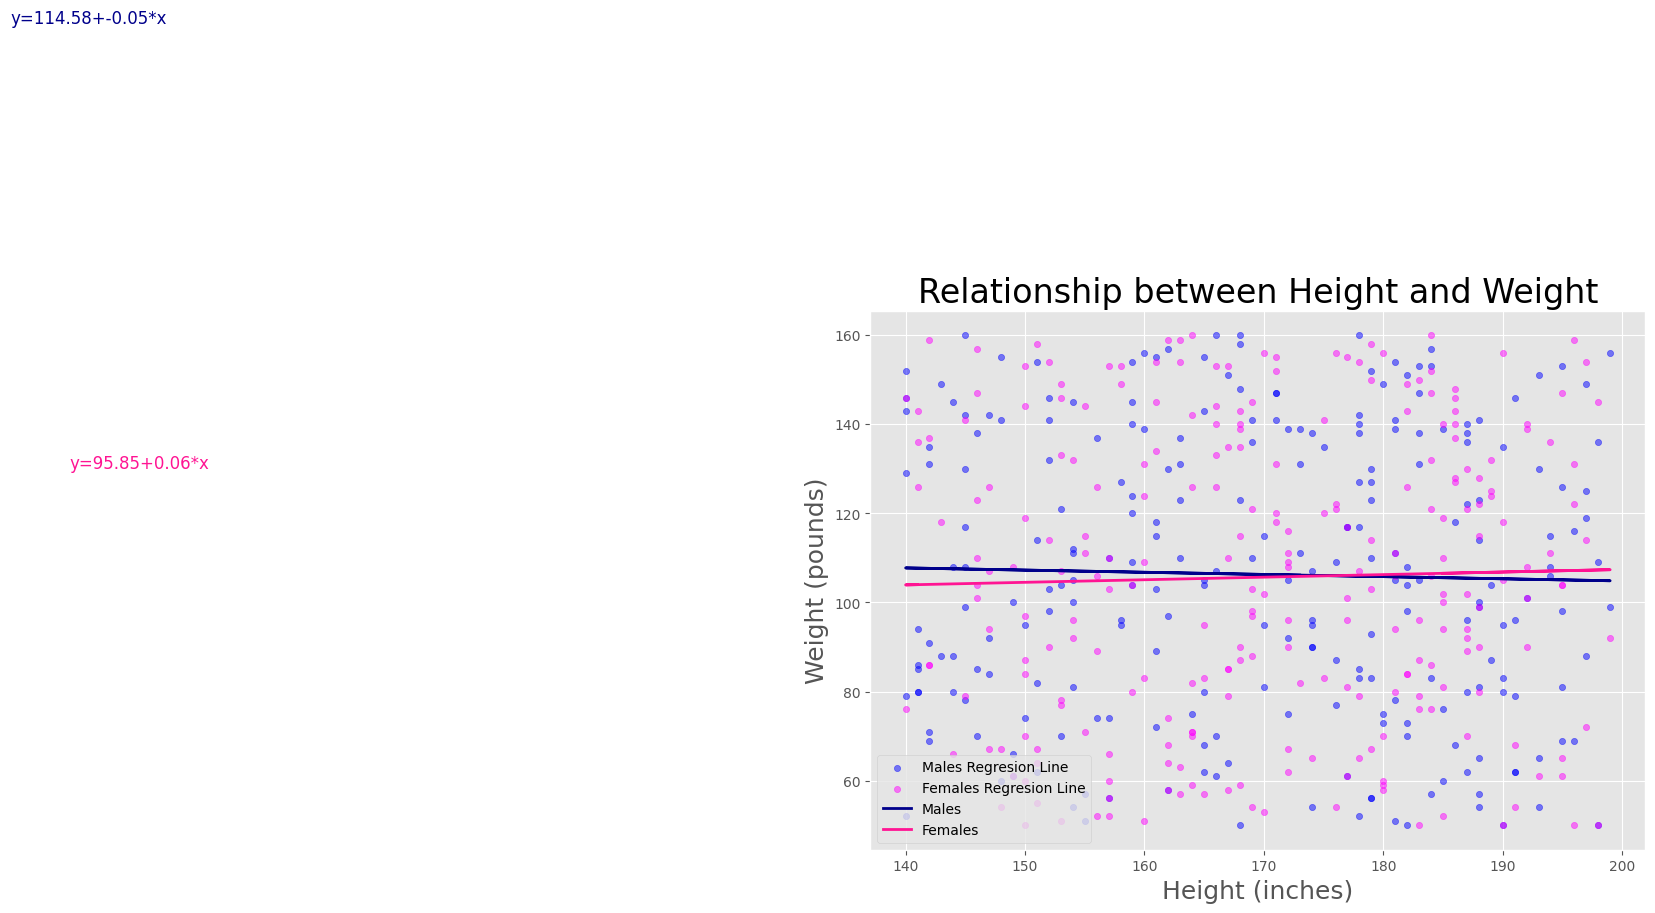

In [24]:
df_males = df[df['Gender'] == 'Male']
df_females = df[df['Gender'] == 'Female']
ax1 = df_males.plot(kind='scatter', x='Height', y='Weight', color='blue', alpha=0.5,
figsize=(10, 7))
df_females.plot(kind='scatter', x='Height', y='Weight', color='magenta', alpha=0.5, figsize=
(10, 7), ax=ax1)
plt.plot(df_males.Height, male_fit[0] * df_males.Height + male_fit[1], color='darkblue',
linewidth=2)
plt.plot(df_females.Height, female_fit[0] * df_females.Height + female_fit[1],
color='deeppink', linewidth=2)
plt.text(65, 230, 'y={:.2f}+{:.2f}*x'.format(male_fit[1], male_fit[0]), color='darkblue',
size=12)
plt.text(70, 130, 'y={:.2f}+{:.2f}*x'.format(female_fit[1], female_fit[0]), color='deeppink',
size=12)
plt.legend(labels=['Males Regresion Line', 'Females Regresion Line', 'Males', 'Females'])
plt.title('Relationship between Height and Weight', size=24)
plt.xlabel('Height (inches)', size=18)
plt.ylabel('Weight (pounds)', size=18);

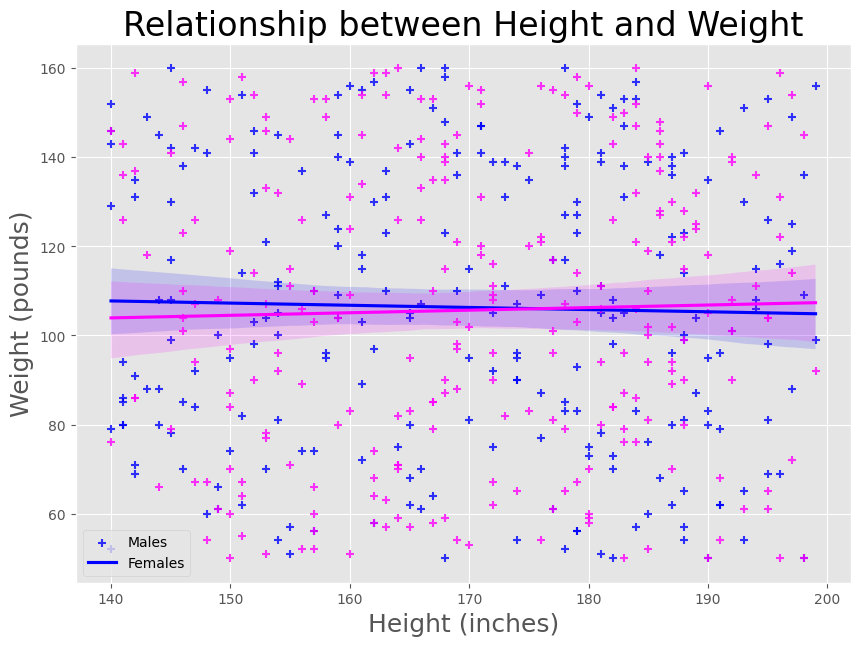

In [25]:
import seaborn as sns
fig = plt.figure(figsize=(10, 7))
sns.regplot(x=df_males.Height, y=df_males.Weight, color='blue', marker='+')
sns.regplot(x=df_females.Height, y=df_females.Weight, color='magenta', marker='+')
plt.legend(labels=['Males', 'Females'])
plt.title('Relationship between Height and Weight', size=24)
plt.xlabel('Height (inches)', size=18)
plt.ylabel('Weight (pounds)', size=18);

In [26]:
from sklearn.linear_model import LinearRegression
df_males = df[df['Gender'] == 'Male']
lr_males = LinearRegression()
lr_males.fit(df_males[['Height']], df_males['Weight'])
10
print(lr_males.intercept_)
print(lr_males.coef_)
df_females = df[df['Gender'] == 'Female']
lr_females = LinearRegression()
lr_females.fit(df_females[['Height']], df_females['Weight'])
print(lr_females.intercept_)
print(lr_females.coef_)

114.58397655987221
[-0.04874589]
95.85267170072629
[0.05783654]


In [27]:
from sklearn.linear_model import LinearRegression
df_males = df[df['Gender'] == 'Male']
lr_males = LinearRegression()
lr_males.fit(df_males[['Height']], df_males['Weight'])
10
print(lr_males.intercept_)
print(lr_males.coef_)
df_females = df[df['Gender'] == 'Female']
lr_females = LinearRegression()
lr_females.fit(df_females[['Height']], df_females['Weight'])
print(lr_females.intercept_)
print(lr_females.coef_)

114.58397655987221
[-0.04874589]
95.85267170072629
[0.05783654]


In [28]:
df_females = df[df['Gender'] == 'Female']
df_females.corr()

<ipython-input-28-b1092c07fb5b>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_females.corr()


,Height,Weight,Index
Height,1.000000,0.027569,-0.362132
Weight,0.027569,1.000000,0.819280
Index,-0.362132,0.819280,1.000000


In [29]:
df_males = df[df['Gender'] == 'Male']
df_males.corr()

<ipython-input-29-c134b2881f75>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_males.corr()


,Height,Weight,Index
Height,1.000000,-0.026133,-0.476934
Weight,-0.026133,1.000000,0.790888
Index,-0.476934,0.790888,1.000000


In [30]:
from scipy import stats
df_females = df[df['Gender'] == 'Female']
pearson_coef, p_value = stats.pearsonr(df_females.Height, df_females.Weight)
print(pearson_coef)
df_males = df[df['Gender'] == 'Male']
pearson_coef, p_value = stats.pearsonr(df_males.Height, df_males.Weight)
print(pearson_coef)

0.027568624092019232
-0.026132882097317366


In [32]:
import seaborn as sns
import matplotlib.pyplot as plt
df_females = df[df['Gender'] == 'Female'].sample(500, random_state=42)
fig, ax = plt.subplots(figsize=(10, 7))
sns.residplot(x='Height', y='Weight', data=df_females, color='magenta', ax=ax)
plt.title('Residual Plot for 500 Females', size=24)
plt.xlabel('Height (inches)', size=18)
plt.ylabel('Weight (pounds)', size=18)
plt.show()

ValueError: Cannot take a larger sample than population when 'replace=False'

In [33]:
print(df['Gender'].dtype)
df_dummy = pd.get_dummies(df, columns=['Gender'], drop_first=True)
df_dummy.head()

object


,Height,Weight,Index,Gender_Male
0,174,96,4,1
1,189,87,2,1
2,185,110,4,0
3,195,104,3,0
4,149,61,3,1
